# Contents <a id='back'></a>

* [Introduction](#intro)
* [1. Data Overview](#data_review)
    * [Conclusions](#data_review_conclusions)
* [2. Data PreProcessing](#data_preprocessing)
    * [2.1 Standardizing Column Names](#column_names)
    * [2.2 Drop Unused Columns](#unused_columns)
    * [2.3 Checking for Data Anomalies](#data_anomalies)
    * [2.4 Handling Missing Values](#missing_values)
    * [2.5 Encoding Features](#encoding_features)
* [3. Model Training and Evaluation](#model_training_evaluation)
    * [3.1 Splitting the dataset into a training set and a test set](#splitting_dataset)
    * [3.2 Training Model](#training_model)
* [General Conclusion](#end)

# Introduction <a id='intro'></a>

In this project, I will compare four models to determine which one has the lowest RMSE value along with the fastest processing time. These models are utilized to estimate the market value of cars using gradient descent techniques.


**Objective:**

Training the gradient descent model and performing hyperparameter tuning using the Root Mean Square Error (RMSE) metric to evaluate the model.

**This project will comprise the following steps:**

1. Data Overview
2. Data preprocessing
3. Model Training and Evaluation

[Back to Contents](#back)

## 1. Data Overview <a id='data_review'></a>

The steps to be performed are as follows:
1. Checking the number of rows and columns.
2. Checking for missing values.
3. Checking for duplicate data.
4. Checking statistical information in columns with numerical data types.
5. Checking values in columns with categorical data types.

[Back to Contents](#back)

In [2]:
# import library

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model

from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

import gc
gc.enable()

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

### 1.1 Data Exploration: df dataset

In [4]:
# load dataset
df = pd.read_csv('data/car_data.csv')

In [5]:
df.shape

(354369, 16)

In [6]:
df.sample(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
91400,03/04/2016 12:52,5,small,1999,manual,105,bravo,150000,4,gasoline,fiat,yes,03/04/2016 00:00,0,97529,05/04/2016 11:44
132802,11/03/2016 06:36,499,NaN,1970,manual,26,NaN,50000,0,NaN,trabant,NaN,11/03/2016 00:00,0,91332,06/04/2016 09:17
92940,03/04/2016 09:49,1450,sedan,2001,auto,0,astra,125000,4,petrol,opel,NaN,03/04/2016 00:00,0,82229,07/04/2016 10:45
254155,22/03/2016 19:48,4500,bus,2005,manual,131,transporter,150000,3,gasoline,volkswagen,no,22/03/2016 00:00,0,6712,06/04/2016 13:15
318969,24/03/2016 19:48,6800,bus,2005,manual,130,sprinter,150000,5,gasoline,mercedes_benz,no,24/03/2016 00:00,0,52222,05/04/2016 12:16
312896,07/03/2016 13:48,1500,sedan,2000,manual,75,golf,150000,7,petrol,volkswagen,no,04/03/2016 00:00,0,91126,09/03/2016 23:45
321477,29/03/2016 11:58,0,sedan,2000,manual,88,3_reihe,150000,10,petrol,mazda,no,29/03/2016 00:00,0,89547,29/03/2016 11:58
177613,21/03/2016 01:01,12750,sedan,2002,auto,334,a8,150000,11,petrol,audi,no,20/03/2016 00:00,0,30974,05/04/2016 22:46
297966,05/03/2016 21:38,1399,wagon,1999,auto,0,passat,150000,9,gasoline,volkswagen,NaN,05/03/2016 00:00,0,27356,07/04/2016 09:16
84820,05/04/2016 11:55,2599,sedan,2007,manual,75,punto,150000,7,gasoline,fiat,NaN,05/04/2016 00:00,0,22523,05/04/2016 11:55


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [8]:
# checking missing values
(df.isnull().sum() / len(df) * 100).sort_values()

DateCrawled           0.000000
Price                 0.000000
RegistrationYear      0.000000
Power                 0.000000
Mileage               0.000000
RegistrationMonth     0.000000
Brand                 0.000000
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
Model                 5.560588
Gearbox               5.596709
FuelType              9.282697
VehicleType          10.579368
NotRepaired          20.079070
dtype: float64

<Axes: >

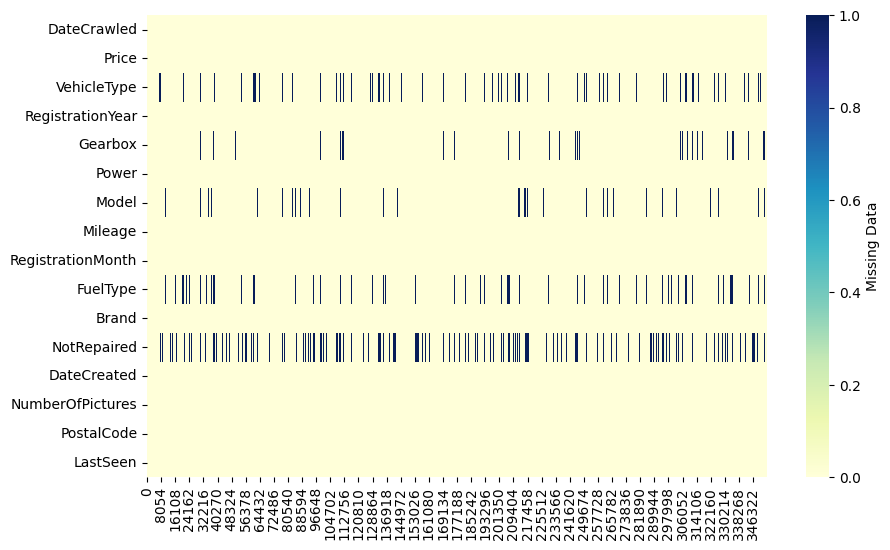

In [10]:
# data visualization for missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [11]:
# understanding statistical information from numerical columns
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [13]:
# constant column
df['NumberOfPictures'].value_counts()

NumberOfPictures
0    354369
Name: count, dtype: int64

Price
Axes(0.125,0.11;0.775x0.77)


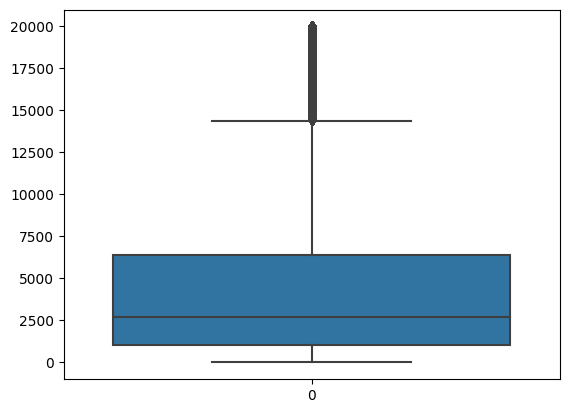


RegistrationYear
Axes(0.125,0.11;0.775x0.77)


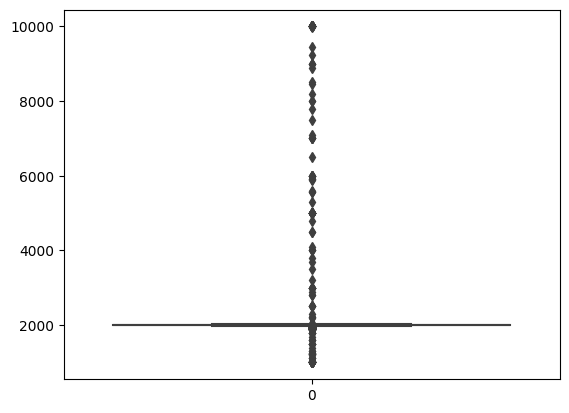


Power
Axes(0.125,0.11;0.775x0.77)


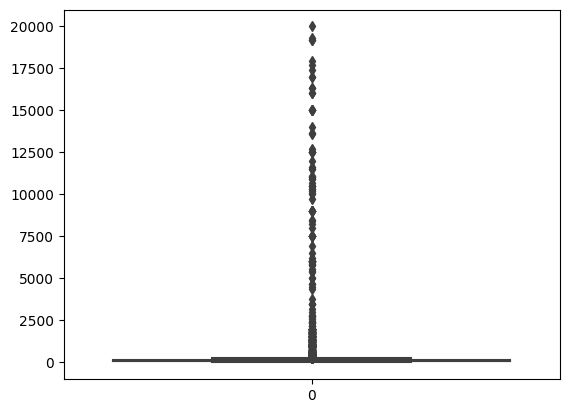


Mileage
Axes(0.125,0.11;0.775x0.77)


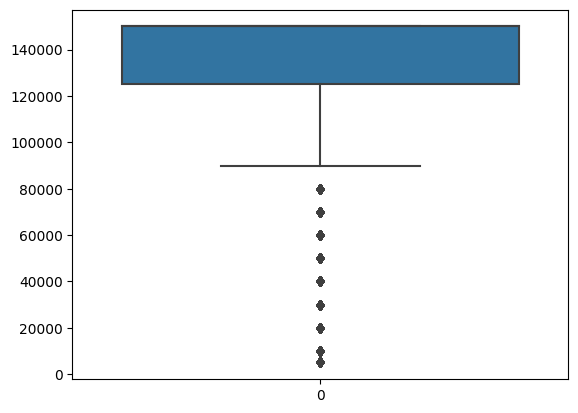

In [18]:
# checking outliers in numerical columns that will be used
columns_outliers = ['Price', 'RegistrationYear', 'Power', 'Mileage']
for column in columns_outliers:
    print(column)
    print(sns.boxplot(df[column]))
    plt.show()
    print()

### 1.2 Conclusion of data overview step

1. Column names are not standardized. They will be converted to lowercase.
2. There are missing values in the following columns: Model (5.5%), Gearbox (5.5%), FuelType (9.28%), VehicleType (10.5%), NotRepaired (10%).
3. Columns that are not used will be dropped, namely: date_crawled, date_created, number_of_pictures, postal_code, last_seen, registration_month.
4. The column number_of_pictures will be dropped as it contains constant values.
5. In the numerical columns, there are some anomalies observed:
    - price with a value of 0
    - registration_year with values 4000, 6000, 8000, 9999
    - power with a value of 0, which should not have values equal to 0.

[Back to Contents](#back)

## 2. Data Preprocessing <a id='data_preprocessing'></a>

### 2.1 Standardizing Column Names <a id='column_names'></a>

In [19]:
df.columns = df.columns.str.lower()

In [20]:
df.columns

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox',
       'power', 'model', 'mileage', 'registrationmonth', 'fueltype', 'brand',
       'notrepaired', 'datecreated', 'numberofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

In [21]:
df = df.rename(columns={
    'datecrawled': 'date_crawled',
    'vehicletype': 'vehicle_type',
    'registrationyear': 'registration_year',
    'registrationmonth': 'registration_month',
    'fueltype': 'fuel_type',
    'notrepaired': 'not_repaired',
    'datecreated': 'date_created',    
    'numberofpictures': 'number_of_pictures',
    'postalcode': 'postal_code',
    'lastseen': 'last_seen'})

### 2.2 Drop Unused Columns <a id='unused_columns'></a>

In [22]:
df = df.drop(['date_crawled', 'date_created', 'registration_month', 'number_of_pictures', 'postal_code', 'last_seen'], axis = 1)

### 2.3 Checking and Fixing Data Anomalies <a id='data_anomalies'></a>

#### 2.3.1 Checking for data anomalies where the price is equal to 0

In [23]:
# checking the percentage
len(df.loc[(df['price'] == 0)]) / len(df) * 100

3.0397692800442475

#### 2.3.2 Checking for data anomalies in registration_year column

In [24]:
len(df.loc[(df['registration_year'] > 2023 ) | (df['registration_year'] < 1980)]) / len(df) * 100

1.0037559718824163

**Findings:**

1. Data will be removed for entries with a registration year above 2023 and below 1980. This will impact a small percentage of the data (1%) and will not significantly affect the analysis results.
2. Data will be removed for entries with a power value of 0 in the respective column.
3. Data will be removed for entries with a price value of 0 in the price column. This step is necessary to ensure accurate prediction results (as the price column is the prediction target), and this represents a small percentage of the total data (3%).

In [25]:
df = df[df['registration_year'] > 1980]

In [26]:
df = df[df['registration_year'] < 2024]

In [27]:
df = df[df['power'] != 0].reset_index(drop=True)

In [28]:
df = df[df['price'] != 0].reset_index(drop=True)

In [29]:
df.shape

(304717, 10)

In [30]:
df

,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired
0,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
1,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
2,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
3,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
4,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...
304712,5250,NaN,2016,auto,150,159,150000,NaN,alfa_romeo,no
304713,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
304714,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
304715,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


### 2.4 Handling Missing Values <a id='missing_values'></a>

In [31]:
(df.isnull().sum() / len(df) * 100).sort_values()

price                 0.000000
registration_year     0.000000
power                 0.000000
mileage               0.000000
brand                 0.000000
gearbox               1.958210
model                 3.933486
fuel_type             6.438761
vehicle_type          6.969089
not_repaired         15.312897
dtype: float64

Columns with missing values are:
1. model
2. gearbox
3. fuel_type
4. vehicle_type
5. not_repaired

**Action to do:**

Since the percentage is below 20%, the data will not be dropped. Instead, it will be filled with the value 'unknown'.

In [32]:
df = df.fillna('unknown')

In [33]:
df.isnull().sum()

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
mileage              0
fuel_type            0
brand                0
not_repaired         0
dtype: int64

### 2.5 Encoding Features <a id='encoding_features'></a>

In [34]:
categorical_features = [
    'vehicle_type',
    'gearbox',
    'model',
    'fuel_type',
    'brand',
    'not_repaired'
]

In [35]:
for feature in categorical_features:
    print(f'features {feature} {len(df[feature].value_counts())}')

features vehicle_type 9
features gearbox 3
features model 249
features fuel_type 8
features brand 40
features not_repaired 3


**Findings:**

Due to the large number of values in the 'model' and 'brand' columns, both of these columns will be dropped. The consideration is that if One-Hot Encoding (OHE) is applied, it would result in an excessive number of columns.

In [36]:
df_ohe = df.drop(['model', 'brand'], axis = 1)
df_ohe = pd.get_dummies(df_ohe)

In [37]:
df_ohe.shape

(304717, 27)

In [38]:
df_ohe.sample(5)

,price,registration_year,power,mileage,vehicle_type_bus,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,vehicle_type_unknown,vehicle_type_wagon,gearbox_auto,gearbox_manual,gearbox_unknown,fuel_type_cng,fuel_type_electric,fuel_type_gasoline,fuel_type_hybrid,fuel_type_lpg,fuel_type_other,fuel_type_petrol,fuel_type_unknown,not_repaired_no,not_repaired_unknown,not_repaired_yes
219280,999,1996,60,150000,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
198076,12500,2008,170,100000,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
164545,2500,2005,150,150000,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
294900,5750,2007,125,80000,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
77749,5650,2008,109,60000,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,False,False


[Back to Contents](#back)

## 3. Model Training and Evaluation <a id='model_training_evaluation'></a>

### 3.1 Splitting the dataset into a training set and a test set <a id='splitting_dataset'></a>

#### 3.1.1 OHE

In [39]:
df_ohe_train_valid, df_ohe_test = train_test_split(df_ohe, test_size = 0.15, random_state = 42)
df_ohe_train, df_ohe_valid = train_test_split(df_ohe_train_valid, test_size = 0.25, random_state=42)

print(df_ohe_train.shape)
print(df_ohe_valid.shape)
print(df_ohe_test.shape)

(194256, 27)
(64753, 27)
(45708, 27)


In [40]:
features_train = df_ohe_train.drop(['price'], axis = 1)
target_train = df_ohe_train['price']

features_valid = df_ohe_valid.drop(['price'], axis = 1)
target_valid = df_ohe_valid['price']

features_test = df_ohe_test.drop(['price'], axis = 1)
target_test = df_ohe_test['price']

#### 3.1.2 Without OHE process

In [41]:
without_OHE = df.copy()

y = without_OHE['price']
X = without_OHE.drop(['price'], axis=1)

del without_OHE

In [42]:
for c in X.columns:
    col_type = X[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        X[c] = X[c].astype('category')

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304717 entries, 0 to 304716
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   vehicle_type       304717 non-null  category
 1   registration_year  304717 non-null  int64   
 2   gearbox            304717 non-null  category
 3   power              304717 non-null  int64   
 4   model              304717 non-null  category
 5   mileage            304717 non-null  int64   
 6   fuel_type          304717 non-null  category
 7   brand              304717 non-null  category
 8   not_repaired       304717 non-null  category
dtypes: category(6), int64(3)
memory usage: 9.0 MB


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [45]:
df_train_valid, df_test = train_test_split(df, test_size = 0.15, random_state = 42)
df_train, df_valid = train_test_split(df_train_valid, test_size = 0.25, random_state=42)

print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(194256, 10)
(64753, 10)
(45708, 10)


In [46]:
df_features_train = df_train.drop(['price'], axis = 1)
df_target_train = df_train['price']

df_features_valid = df_valid.drop(['price'], axis = 1)
df_target_valid = df_valid['price']

df_features_test = df_test.drop(['price'], axis = 1)
df_target_test = df_test['price']

gc.collect()

7658

### 3.2 Training Model <a id='training_model'></a>

In [47]:
# creating function to calculate RMSE
def rmse(target, prediction):
    return mean_squared_error(target, prediction)**0.5

#### 3.2.1 Linear Regression Model

In [48]:
%%time

model = LinearRegression()
model.fit(features_train, target_train)

CPU times: user 273 ms, sys: 79.7 ms, total: 353 ms
Wall time: 185 ms


LinearRegression()

In [50]:
%%time

pred_train = model.predict(features_train)
pred_valid = model.predict(features_valid)
pred_test = model.predict(features_test)

print('RMSE for train set:', rmse(target_train, pred_train))
print('RMSE for valid set:', rmse(target_valid, pred_valid))
print('RMSE for test set:', rmse(target_test, pred_test))

RMSE for train set: 3030.918640114626
RMSE for valid set: 3011.971271674251
RMSE for test set: 3037.850419864315
CPU times: user 138 ms, sys: 43.6 ms, total: 181 ms
Wall time: 75.4 ms


#### 3.2.2 Decision Tree Model

In [52]:
# hyperparameter tuning
for depth in range (1,16):
    model = DecisionTreeRegressor(max_depth= depth)
    model.fit(features_train, target_train)
    
    pred_train = model.predict(features_train)
    pred_valid = model.predict(features_valid)
    
    print('At depth:', depth)
    print('RMSE for train set:', rmse(target_train, pred_train))
    print('RMSE for valid set:', rmse(target_valid, pred_valid))
    print()

At depth: 1
RMSE for train set: 3729.1323679638263
RMSE for valid set: 3697.670103660782

At depth: 2
RMSE for train set: 3241.059700567706
RMSE for valid set: 3205.49677756293

At depth: 3
RMSE for train set: 2942.906508858404
RMSE for valid set: 2919.114762222325

At depth: 4
RMSE for train set: 2650.1596787676413
RMSE for valid set: 2644.0906920658895

At depth: 5
RMSE for train set: 2435.23381158589
RMSE for valid set: 2431.1877485040036

At depth: 6
RMSE for train set: 2286.4056393546994
RMSE for valid set: 2292.540642397936

At depth: 7
RMSE for train set: 2167.1831682255515
RMSE for valid set: 2172.709503630197

At depth: 8
RMSE for train set: 2080.8215792004166
RMSE for valid set: 2096.0714791510723

At depth: 9
RMSE for train set: 2008.3450265866131
RMSE for valid set: 2043.4153109832464

At depth: 10
RMSE for train set: 1939.0746993037696
RMSE for valid set: 2000.0033237554953

At depth: 11
RMSE for train set: 1865.0740262229383
RMSE for valid set: 1962.7405935568277

At dept

**Analysis Results**

From the above hyperparameter results, **the best depth is 8**. This is because the difference in RMSE values between the train set and the validation set is not significant (indicating no overfitting), and it is the lowest among depths 1 to 8.

In [53]:
%%time

model = DecisionTreeRegressor(max_depth = 8)
model.fit(features_train, target_train)

CPU times: user 338 ms, sys: 7.1 ms, total: 345 ms
Wall time: 348 ms


DecisionTreeRegressor(max_depth=8)

In [54]:
%%time

pred_train = model.predict(features_train)
pred_valid = model.predict(features_valid)
pred_test = model.predict(features_test)

print('RMSE for train set:', rmse(target_train, pred_train))
print('RMSE for valid set:', rmse(target_valid, pred_valid))
print('RMSE for test set:', rmse(target_test, pred_test))

RMSE for train set: 2080.8215792004166
RMSE for valid set: 2096.018677132617
RMSE for test set: 2107.0953101300224
CPU times: user 47.7 ms, sys: 7.14 ms, total: 54.8 ms
Wall time: 80.4 ms


**Findings related to the comparison of Linear Regression and Decision Tree Regressor:**

1. In terms of time, the Linear Regression model takes 384 ms to train the model and 114 ms to predict.
2. In terms of time, the Decision Tree Regressor model takes 532 ms to train the model and 53.4 ms to predict.
3. In terms of RMSE values, the results for the Linear Regression model are as follows:
    - RMSE for the train set: 3030.918640114626
    - RMSE for the validation set: 3011.971271674251
    - RMSE for the test set: 3037.850419864315
4. In terms of RMSE values, the results for the Decision Tree Regressor model are as follows:
    - RMSE for the train set: 2080.8215792004166
    - RMSE for the validation set: 2096.1324636142726
    - RMSE for the test set: 2108.0985267118494
5. In terms of processing time, Linear Regression has a slight advantage (although the time difference is not significant). However, the RMSE values are better when using the Decision Tree Regressor model.

#### 3.2.3 Random Forest Model

In [55]:
max_depth_list = [1,2,6,8,10]
n_estimator_list = [50, 100, 150, 200, 500]

for depth in max_depth_list:
    for est in n_estimator_list:
        model = RandomForestRegressor(max_depth=depth, n_estimators = est, random_state = 42)
        model.fit(features_train, target_train)
        
        pred_train = model.predict(features_train)
        pred_valid = model.predict(features_valid)
        
        print('RMSE for train set at max_depth:', depth, 'and n_estimator: ', est, 'is:', rmse(target_train, pred_train))
        print('RMSE for valid set at max_depth:', depth, 'and n_estimator: ', est, 'is:', rmse(target_valid, pred_valid))
        print()

RMSE for train set at max_depth: 1 and n_estimator:  50 is: 3729.1332192053783
RMSE for valid set at max_depth: 1 and n_estimator:  50 is: 3697.667511695172

RMSE for train set at max_depth: 1 and n_estimator:  100 is: 3729.132500513027
RMSE for valid set at max_depth: 1 and n_estimator:  100 is: 3697.6679485533546

RMSE for train set at max_depth: 1 and n_estimator:  150 is: 3727.6692429393274
RMSE for valid set at max_depth: 1 and n_estimator:  150 is: 3696.264514371823

RMSE for train set at max_depth: 1 and n_estimator:  200 is: 3726.9458857162945
RMSE for valid set at max_depth: 1 and n_estimator:  200 is: 3695.5691923813456

RMSE for train set at max_depth: 1 and n_estimator:  500 is: 3726.504423321379
RMSE for valid set at max_depth: 1 and n_estimator:  500 is: 3695.14375550419

RMSE for train set at max_depth: 2 and n_estimator:  50 is: 3240.124510771355
RMSE for valid set at max_depth: 2 and n_estimator:  50 is: 3204.6033277370834

RMSE for train set at max_depth: 2 and n_esti

**Analysis Results**

From the above hyperparameter results, **the best depth is 8 and n_esimator is 200**. This is because the difference in RMSE values between the train set and the validation set is not significant (indicating no overfitting), and it is the lowest among depths 1 to 8.

In [56]:
%%time

model = RandomForestRegressor(max_depth=8, n_estimators = 200, random_state = 42)
model.fit(features_train, target_train)

CPU times: user 45 s, sys: 307 ms, total: 45.3 s
Wall time: 46.2 s


RandomForestRegressor(max_depth=8, n_estimators=200, random_state=42)

In [49]:
%%time

pred_train = model.predict(features_train)
pred_valid = model.predict(features_valid)
pred_test = model.predict(features_test)

print('RMSE untuk train set:', rmse(target_train, pred_train))
print('RMSE untuk valid set:', rmse(target_valid, pred_valid))
print('RMSE untuk test set:', rmse(target_test, pred_test))

RMSE untuk train set: 2032.9603534810776
RMSE untuk valid set: 2046.7549186999825
RMSE untuk test set: 2062.256812392978
CPU times: user 5.2 s, sys: 8 ms, total: 5.2 s
Wall time: 5.2 s


**Findings related to the comparison of results between Decision Tree Regressor and Random Forest Regressor:**

1. In terms of time, the Decision Tree Regressor model takes 532 ms to train the model and 53.4 ms to predict.
2. In terms of time, the Random Forest Regressor model takes 1 minute and 9 seconds to train the model and 5.2 seconds to predict.
3. In terms of RMSE values, the results for the Decision Tree Regressor model are as follows:
    - RMSE for the train set: 2080.8215792004166
    - RMSE for the validation set: 2096.1324636142726
    - RMSE for the test set: 2108.0985267118494
4. In terms of RMSE values, the results for the Random Forest Regressor model are better, but not significantly so, with the following details:
    - RMSE for the train set: 2032.9603534810776
    - RMSE for the validation set: 2046.7549186999825
    - RMSE for the test set: 2062.256812392978
5. In terms of processing time, Linear Regression is more efficient (with a significant time difference). Regarding RMSE values, Random Forest performs better, but the difference is not significant.

### 3.2.4 CatBoost

In [57]:
cat_features = [
    'vehicle_type',
    'gearbox',
    'model',
    'fuel_type',
    'brand',
    'not_repaired'
]

In [58]:
%%time

model = CatBoostRegressor(iterations= 150, random_seed = 42)
model.fit(df_features_train, df_target_train, cat_features=cat_features, verbose=10)

Learning rate set to 0.44013
0:	learn: 3413.0404799	total: 87.1ms	remaining: 13s
10:	learn: 1890.1088519	total: 417ms	remaining: 5.27s
20:	learn: 1791.9377095	total: 862ms	remaining: 5.29s
30:	learn: 1745.1178163	total: 1.27s	remaining: 4.87s
40:	learn: 1709.5208796	total: 1.56s	remaining: 4.15s
50:	learn: 1684.0876758	total: 1.81s	remaining: 3.52s
60:	learn: 1666.2011964	total: 2.04s	remaining: 2.97s
70:	learn: 1652.3268384	total: 2.28s	remaining: 2.54s
80:	learn: 1640.6421594	total: 2.51s	remaining: 2.13s
90:	learn: 1628.2999583	total: 2.83s	remaining: 1.83s
100:	learn: 1616.8838525	total: 3.05s	remaining: 1.48s
110:	learn: 1605.1830168	total: 3.29s	remaining: 1.16s
120:	learn: 1597.2735540	total: 3.54s	remaining: 849ms
130:	learn: 1591.7112680	total: 3.79s	remaining: 550ms
140:	learn: 1584.3948860	total: 4.2s	remaining: 268ms
149:	learn: 1578.3880635	total: 4.42s	remaining: 0us
CPU times: user 20.5 s, sys: 1.13 s, total: 21.7 s
Wall time: 4.8 s


In [59]:
%%time

pred_train = model.predict(df_features_train)
pred_valid = model.predict(df_features_valid)
pred_test = model.predict(df_features_test)

print('RMSE for train set:', rmse(df_target_train, pred_train))
print('RMSE for valid set:', rmse(df_target_valid, pred_valid))
print('RMSE for test set:', rmse(df_target_test, pred_test))

RMSE for train set: 1575.4128372253374
RMSE for valid set: 1615.0450134140049
RMSE for test set: 1645.5720694106196
CPU times: user 518 ms, sys: 18.7 ms, total: 537 ms
Wall time: 393 ms


**Findings regarding the differences between Decision Tree and CatBoost:**

1. In terms of time, the Decision Tree Regressor model takes 532 ms to train the model and 53.4 ms to predict.
2. In terms of time, the CatBoost model takes 26.4 seconds to train the model and 522 ms to predict.
3. In terms of RMSE values, the results for the Decision Tree Regressor model are as follows:
    - RMSE for the train set: 2080.8215792004166
    - RMSE for the validation set: 2096.1324636142726
    - RMSE for the test set: 2108.0985267118494
4. In terms of RMSE values, the results for the CatBoost model are significantly better with the following results:
    - RMSE for the train set: 1575.4128372253374
    - RMSE for the validation set: 1615.0450134140049
    - RMSE for the test set: 1645.5720694106196
5. In terms of processing time, Linear Regression is more efficient (with an insignificant time difference). Regarding RMSE values, CatBoost performs significantly better.

[Back to Contents](#back)

# General Conclusion <a id='end'></a>

From the 4 models that have been trained along with the comparison findings for each model, it can be concluded that the CatBoost model has the best (lowest) RMSE values with processing time that is not significantly different from the Decision Tree Regressor.

[Back to Contents](#back)